In [1]:
import sys
import time
import math
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(1, '../src/')
import os.path
import kde as kde
import scms as scms
from fastkde import fastKDE

In [2]:
data = np.loadtxt('P.0500.ascii', unpack=True, skiprows=1)
R = np.sqrt(data[1,:] ** 2 + data[2,:] ** 2)
z = data[3,:]
vz = data[6,:]
vR = (data[1,:] * data[4,:] + data[2,:] * data[5,:]) / R
vp = (data[1,:] * data[5,:] - data[2,:] * data[4,:]) / R
Lz = vp * R

In [3]:
points = np.vstack([z, vz]).T

In [4]:
def plot_2d_histogram(x, y, bins=100, filename="test.png", title=""):
    hist, xe, ye = np.histogram2d(x,y,bins=bins)
    fig = plt.pcolormesh(xe,ye,hist.T,cmap='RdPu')
    plt.xlabel("$z$")
    plt.ylabel("$v_z$")
#     plt.xlim((-1.5, 1.5))
#     plt.ylim((-0.8, 0.8))
    plt.title(title)
    plt.colorbar()
    plt.savefig(filename, dpi=300)
    plt.show()

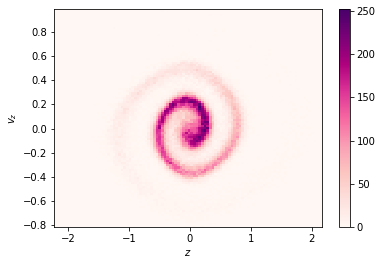

In [5]:
plot_2d_histogram(points[:,0], points[:,1], bins=100, filename='original.png')

In [6]:
data = np.loadtxt('U.0500.ascii', unpack=True, skiprows=1)
R = np.sqrt(data[1,:] ** 2 + data[2,:] ** 2)
z = data[3,:]
vz = data[6,:]
vR = (data[1,:] * data[4,:] + data[2,:] * data[5,:]) / R
vp = (data[1,:] * data[5,:] - data[2,:] * data[4,:]) / R
Lz = vp * R
bg_points = np.vstack([z, vz]).T[:200000]

ratio = points.shape[0] / bg_points.shape[0]
# ratio = 'N/A'
print("Spiral2Background Ratio: {}".format(ratio))

Spiral2Background Ratio: 0.50075


In [7]:
points = np.concatenate([points, bg_points])

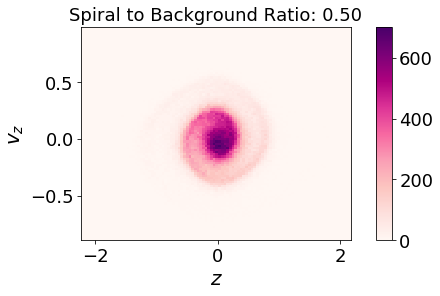

In [10]:
plot_2d_histogram(points[:,0], points[:,1], filename='original_1.png', title="Spiral to Background Ratio: {:.2f}".format(ratio))

In [24]:
d = 2
A0 = 1.2
bw = A0 * min(np.std(points[:,0]), np.std(points[:,1])) * 1 / (
    d + 2) ** (1 / (d + 4)) / points.shape[0] ** (1 / (d + 4))
print("BW =", bw)
bin_widths = 3.5 * np.std(points, axis=0) * points.shape[0] ** (-1/3)
x_bounds, y_bounds = 256 * bin_widths / 2
# x_bounds, y_bounds = 5, 3
print(bin_widths)
print(x_bounds, y_bounds)
x, y = np.linspace(-x_bounds,x_bounds,256), np.linspace(-y_bounds,y_bounds,256)

BW = 0.02247508186622262
[0.01879861 0.0100935 ]
2.4062215908041127 1.2919677041705733


In [19]:
start_time = time.time()
pdf2 = kde.kde2(points, x, y, bandwidth=bw)
end_time = time.time()
print("Computation Time: {:.2f} seconds".format(end_time - start_time))

Computation Time: 0.04 seconds


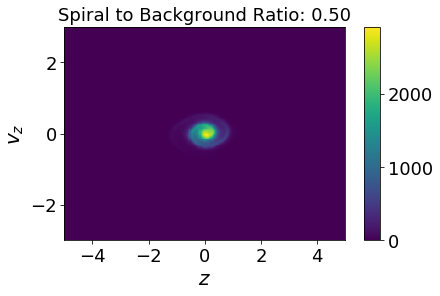

In [20]:
plt.pcolormesh(x, y, pdf2)
plt.colorbar()
plt.title("Spiral to Background Ratio: {:.2f}".format(ratio))
plt.xlabel("$z$")
plt.ylabel("$v_z$")
plt.savefig("kde_2.png", dpi=300)
plt.show()

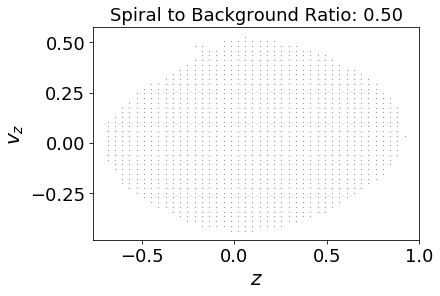

In [21]:
mesh_points = scms.generate_mesh2(x, y, np.std(pdf2), pdf2)
plt.style.use('fullwidthplot.mplstyle')
plt.plot(mesh_points[:,0], mesh_points[:,1], 'k.', markersize=0.3)
plt.title("Spiral to Background Ratio: {:.2f}".format(ratio))
plt.xlabel("$z$")
plt.ylabel("$v_z$")
# plt.savefig('original_2.png', dpi=300)
plt.show()

In [22]:
dx, dy, dxx, dyy, dxy, dyx = kde.dkde2(points, x, y, bandwidth=bw)
dpdf = [dx, dy]
ddpdf = [dxx, dyy, dxy, dyx]
new_points = scms.scms2(mesh_points, x, y, pdf2, dpdf, ddpdf, m=0)

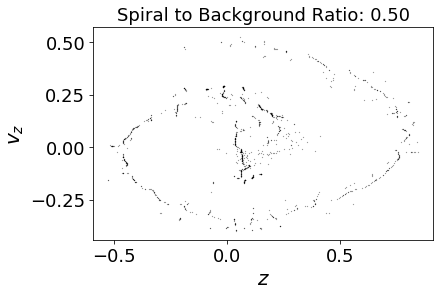

In [23]:
plt.plot(new_points[:,0], new_points[:,1], 'k.', markersize=0.3)
plt.title("Spiral to Background Ratio: {:.2f}".format(ratio))
plt.xlabel("$z$")
plt.ylabel("$v_z$")
plt.savefig("result_1_adjusted.png", dpi=300)
plt.show() 

In [9]:
plt.style.use('fullwidthplot.mplstyle')